# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [0]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [0]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [0]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=60000)

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_test.shape

(10000, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

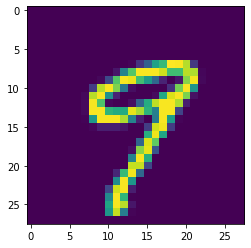

In [11]:
plt.imshow(np.reshape(X_test[2],(28,28)))

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [8]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
from sklearn.linear_model import SGDClassifier

slm = SGDClassifier(loss='log', max_iter=100)
slm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

bayes_accuracy = accuracy_score(y_test, bayes.predict(X_test))
bayes_f1 = f1_score(y_test, bayes.predict(X_test),average='micro')
bayes_roc_fpr,bayes_roc_tpr,_ = roc_curve(y_test=='5', bayes.predict(X_test).astype(int)==5)

In [34]:
bayes_accuracy

0.5468

In [35]:
bayes_f1

0.5468

In [0]:
slm_accurracy = accuracy_score(y_test, slm.predict(X_test))
slm_f1 = f1_score(y_test, slm.predict(X_test),average='micro')
slm_roc_fpr,slm_roc_tpr,_ = roc_curve(y_test=='5', slm.predict(X_test).astype(int)==5)

In [29]:
slm_accurracy

0.892

In [30]:
slm_f1

0.892

In [0]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_f1 = f1_score(y_test, rf.predict(X_test),average='micro')
rf_roc_fpr,rf_roc_tpr,_= roc_curve(y_test=='5', rf.predict(X_test).astype(int)==5)

In [44]:
rf_accuracy

0.9667

In [45]:
rf_f1

0.9667

Text(0.5, 1.0, 'ROC')

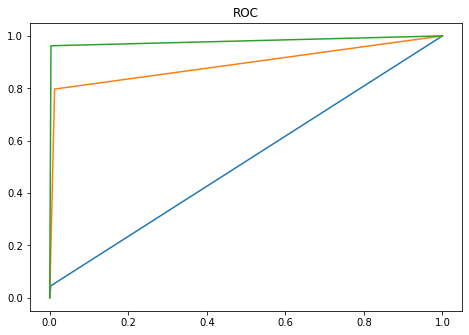

In [75]:
figure = plt.figure()
axes = figure.add_axes([1,1,1,1])
axes.plot(bayes_roc_fpr,bayes_roc_tpr)
axes.plot(slm_roc_fpr,slm_roc_tpr)
axes.plot(rf_roc_fpr,rf_roc_tpr)
axes.set_title('ROC')